In [1]:
import pandas as pd
from matplotlib import pyplot as plt
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
%matplotlib inline

df = pd.read_pickle('df_S300_featurized')

In [2]:
# a posteriori outliers
outliers = ['mp-10615', 'mp-28797', 'mp-20450', 'mp-552547', 'mp-551243', 'mp-10614', 
            'mp-12927', 'mp-975140', 'mp-552234','mp-7738', 'mp-4547', 'mp-774907', 
            'mp-570097', 'mp-552806', 'mp-7863', 'mp-13277', 'mp-545500', 'mp-547244', 'mp-10616']

features = list(df.drop('Input Data|S_300_atom',axis=1).columns)
mpids = list(df.index)
x = df.loc[:,features].values
y = df[['Input Data|S_300_atom']].values

In [3]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [4]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(x)
pc = pca.components_
ev = pca.explained_variance_ratio_
ev

array([7.01402258e-02, 4.51404203e-02, 3.55186015e-02, ...,
       9.39031111e-10, 2.82631496e-10, 1.00096721e-33])

# principal components

In [5]:
comp1 = pc[0,:]
idx = comp1.argsort()
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp1[i]*100,features[i]))

-9.34 % of ChemEnvSiteFingerprint|mean MI:10
-9.33 % of ChemEnvSiteFingerprint|mean S:10
-9.33 % of ChemEnvSiteFingerprint|mean DD:20
-9.33 % of ChemEnvSiteFingerprint|mean SH:11
-9.33 % of ChemEnvSiteFingerprint|std_dev SH:11
-9.33 % of ChemEnvSiteFingerprint|std_dev DD:20
-9.33 % of ChemEnvSiteFingerprint|std_dev H:10
-9.33 % of ChemEnvSiteFingerprint|std_dev S:12
-9.33 % of ChemEnvSiteFingerprint|mean CO:11
-9.33 % of ChemEnvSiteFingerprint|mean S:12


In [6]:
comp1 = pc[0,:]
idx = comp1.argsort()[::-1]
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp1[i]*100,features[i]))

5.30 % of CrystalNNFingerprint|mean wt CN_20
4.85 % of CrystalNNFingerprint|std_dev wt CN_20
3.39 % of BondFractions|Ba - Li bond frac.
2.50 % of BondFractions|Bi - O bond frac.
2.28 % of BondFractions|B - Y bond frac.
2.28 % of ElementFraction|Cr
2.28 % of BondFractions|B - Cr bond frac.
2.14 % of StructuralHeterogeneity|max relative bond length
2.13 % of BondFractions|Ba - Be bond frac.
2.11 % of BondFractions|H - Y bond frac.


In [7]:
comp2 = pc[1,:]
idx = comp2.argsort()[::-1]
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp2[i]*100,features[i]))

10.19 % of GeneralizedRDF|std_dev Gaussian center=1.0 width=1.0
10.17 % of ChemEnvSiteFingerprint|GaussianSymmFuncstd_dev G2_20.0
9.60 % of AGNIFingerPrint|std_dev AGNI eta=1.23e+00
9.51 % of AGNIFingerPrint|std_dev AGNI eta=1.88e+00
8.97 % of BondOrientationParameter|mean BOOP Q l=2
8.69 % of ChemEnvSiteFingerprint|GaussianSymmFuncstd_dev G4_0.005_4.0_-1.0
8.57 % of BondOrientationParameter|std_dev BOOP Q l=2
8.57 % of StructuralHeterogeneity|mean absolute deviation in relative bond length
8.33 % of GeneralizedRDF|std_dev Gaussian center=0.0 width=1.0
8.10 % of StructuralHeterogeneity|avg_dev neighbor distance variation


# Transform data

In [8]:
new_x = pca.transform(x)
labels = ["pc {}".format(i+1) for i in range(len(ev))]
new_df = pd.DataFrame(data = new_x, columns = labels)
new_df.index = df.index
new_df = pd.concat([df[['Input Data|S_300_atom']],new_df], axis = 1)
new_df.to_pickle('df_pca_S300')

# 2D Visualisation

Text(0, 0.5, 'Second principal axis')

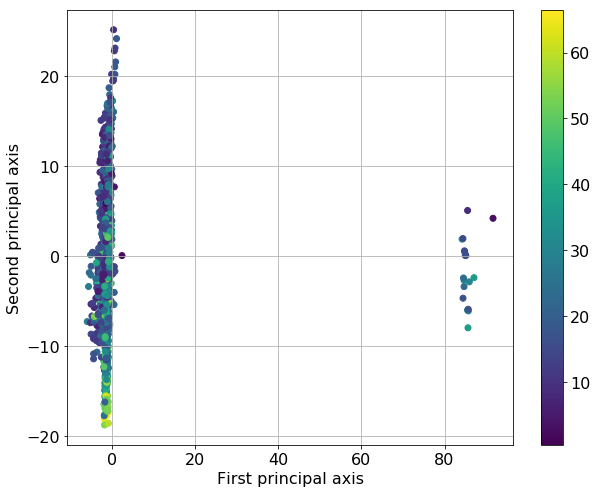

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.grid()
plt.scatter(new_x[:,0],new_x[:,1],c=y.reshape((-1,)).tolist())
plt.colorbar()
#ax.set_xlim([-6,4])
ax.set_xlabel("First principal axis")
ax.set_ylabel("Second principal axis")

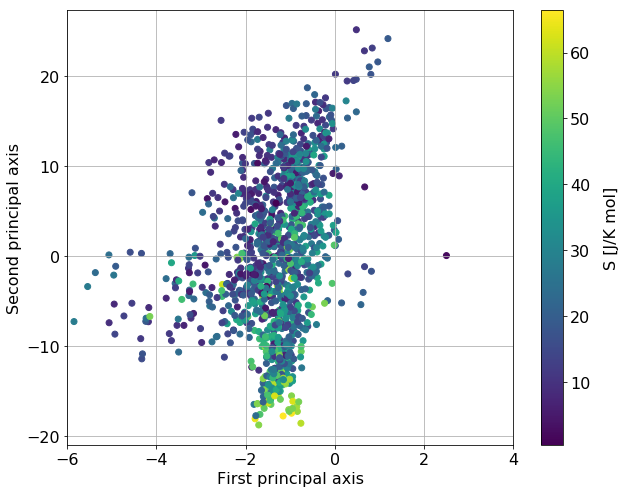

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(new_x[:,0],new_x[:,1],c=y.reshape((-1,)).tolist())
ax.grid()
cbar = plt.colorbar()
ax.set_xlim([-6,4])
ax.set_xlabel("First principal axis")
ax.set_ylabel("Second principal axis")
cbar.set_label('S [J/K mol]',  labelpad=14)

Text(0, 0.5, 'Third principal axis')

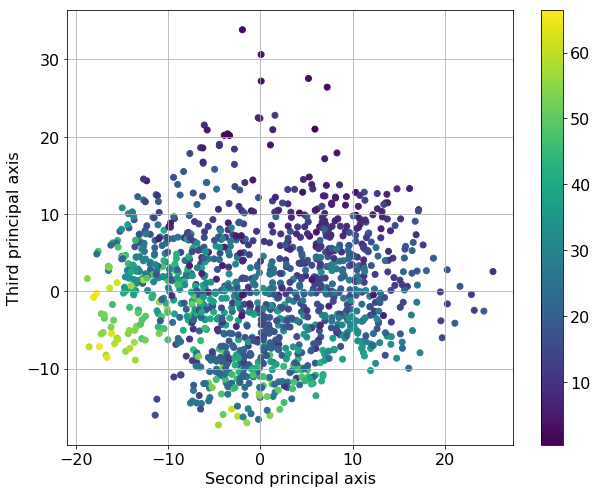

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist())
ax.grid()
plt.colorbar()
ax.set_xlabel("Second principal axis")
ax.set_ylabel("Third principal axis")

# 3D Visualisation

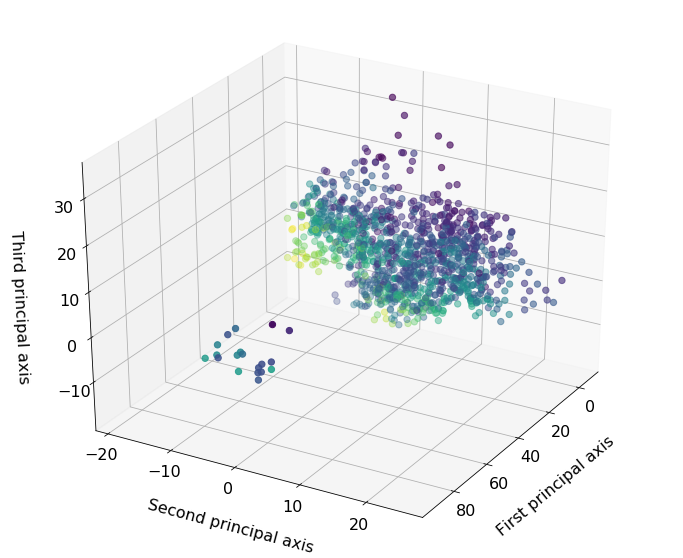

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_x[:,0],new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist(),s=40)
#lt.colorbar()
#ax.set_xlim([-6,4])
#ax.set_ylim([-6,4])
#x.set_zlim([-10,10])
ax.view_init(elev=30, azim=30)
ax.set_xlabel("First principal axis")
ax.set_ylabel("Second principal axis")
ax.set_zlabel("Third principal axis")
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20
fig.savefig('PCA.pdf')

In [ ]:
a = []
for i,x in enumerate(mpids):
    if new_x[i,0] > 10:
        print(x,new_x[i,0])
        print(df['ChemEnvSiteFingerprint|mean S:10'][x])
        a.append(x)

In [ ]:
df['CrystalNNFingerprint|std_dev wt CN_20']

In [ ]:
print(a)

# Ouliers removal => in fact not outliers

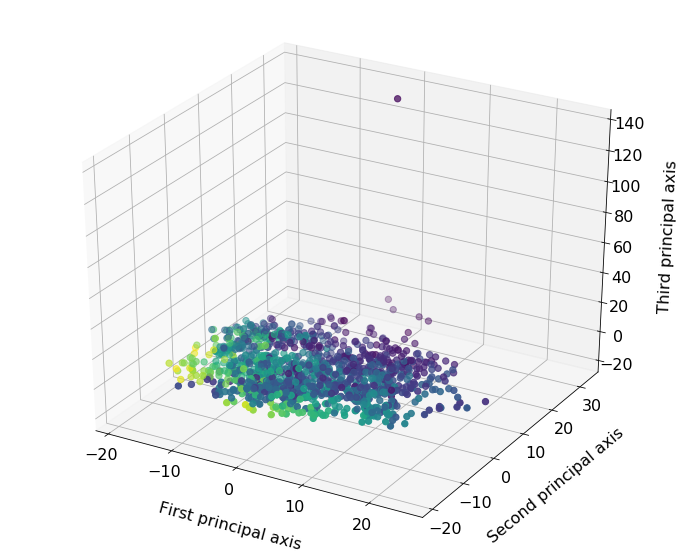

In [15]:
outliers = ['mp-10615', 'mp-28797', 'mp-20450', 'mp-552547', 'mp-551243', 'mp-10614', 
            'mp-12927', 'mp-975140', 'mp-552234','mp-7738', 'mp-4547', 'mp-774907', 
            'mp-570097', 'mp-552806', 'mp-7863', 'mp-13277', 'mp-545500', 'mp-547244', 'mp-10616']
df = df.drop(outliers,axis=0)

features = list(df.drop('Input Data|S_300_atom',axis=1).columns)
mpids = list(df.index)
x = df.loc[:,features].values
y = df[['Input Data|S_300_atom']].values

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(x)
pc = pca.components_
ev = pca.explained_variance_ratio_
new_x = pca.transform(x)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_x[:,0],new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist(),s=40)
#lt.colorbar()
#ax.set_xlim([-6,4])
#ax.set_ylim([-6,4])
#x.set_zlim([-10,10])
#ax.view_init(elev=30, azim=30)
ax.set_xlabel("First principal axis")
ax.set_ylabel("Second principal axis")
ax.set_zlabel("Third principal axis")
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

In [1]:
a = [8.87169863298715, 8.741945035850188, 8.750258577339142, 6.4636201967293, 6.461968368497719, 6.131418512872903, 6.072303181996785, 6.026883736872769, 6.094437703607552, 5.597451573864045, 5.308393246696656, 5.57723146655952, 5.362284610970432, 5.30668613796732, 5.19772934512441, 5.170157215269694, 4.900831574833537, 5.047106082477723, 4.550431366388099, 4.638669613456152, 4.454969322973466, 4.308323309139075, 4.174356202610047, 3.8797520373480388, 3.942415099900411, 3.7917899465177904, 3.7677660916177147, 3.328186074021351, 2.661162151682329, 2.584378078814585, 2.525996450291101, 2.5574287700270077, 2.44976227663607, 2.5375747575769467, 2.347022811394619]

35

600